In [1]:
from IPython.display import clear_output

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

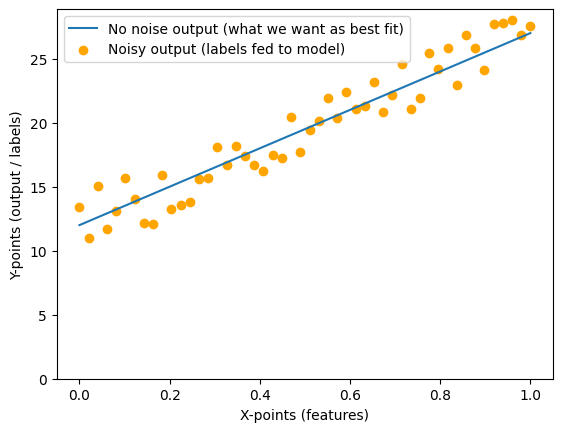

In [3]:
#Linear Regression from Scratch (Using numpy)
w0 = 12  # bias
w1 = 15  # first degree co-efficient
noise_scale_factor = 5  # the higher this is, the rougher and farther the noisy output is from the best fit
num_points = 50  # number of samples in data
x_points = np.linspace(0, 1, num_points)  # num_points points from 0 to 1
y_points_no_noise = w0 + w1*x_points  # The actual features which we'd feed to model will have slight noise
noise = noise_scale_factor * (np.random.rand(*y_points_no_noise.shape)-0.5)  # Look at the explanation below to see how this is calculated
y_points = y_points_no_noise + noise
plt.plot(x_points, y_points_no_noise, label='No noise output (what we want as best fit)')
plt.scatter(x_points, y_points, c="Orange", label='Noisy output (labels fed to model)')
_, ylim_top = plt.ylim()
plt.ylim(0, ylim_top)  # 0 bottom makes it easy to visualize bias term
plt.xlabel('X-points (features)')
plt.ylabel('Y-points (output / labels)')
plt.legend()
plt.show()

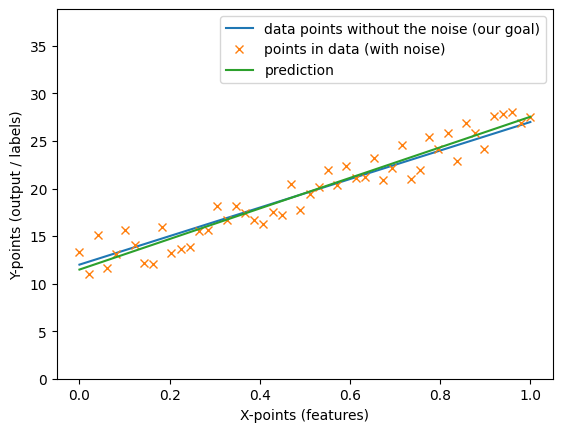

In [4]:
# Custom calculating best fit
num_bases = 1
A = [x_points**i for i in range(num_bases+1)]
A = np.array(A).T
w = np.linalg.inv(A.T @ A) @ (A.T @ y_points)
y_pred = A @ w


# Visualize the results
plt.plot(x_points, y_points_no_noise, label='data points without the noise (our goal)')
plt.plot(x_points, y_points, 'x', label='points in data (with noise)')
plt.plot(x_points, y_pred, label='prediction')
_, ylim_top = plt.ylim()
plt.ylim(0, ylim_top+10)

plt.xlabel('X-points (features)')
plt.ylabel('Y-points (output / labels)')

plt.legend()
plt.show()

In [5]:
print(f'Actual weight values we used: {(w0, w1)}')
print(f'Values calculated by Model: {tuple(w)}')

Actual weight values we used: (12, 15)
Values calculated by Model: (11.479479636488021, 16.07195555543043)


In [6]:
# use sklearn
model = LinearRegression(fit_intercept=True)
model = model.fit(x_points.reshape(-1, 1), y_points)

In [7]:
y_pred = model.predict(x_points.reshape(-1, 1))

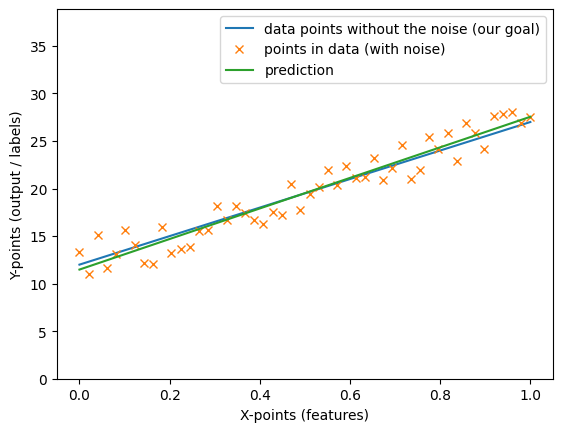

In [8]:
plt.plot(x_points, y_points_no_noise, label='data points without the noise (our goal)')
plt.plot(x_points, y_points, 'x', label='points in data (with noise)')
plt.plot(x_points, y_pred, label='prediction')

_, ylim_top = plt.ylim()
plt.ylim(0, ylim_top+10)
plt.xlabel('X-points (features)')
plt.ylabel('Y-points (output / labels)')

plt.legend()
plt.show()